In [1]:
import matplotlib.pyplot as plt
import rasterio

def show_img(p):
    with rasterio.open(p) as src:
        image_data = src.read()

    plt.imshow(image_data[0])

In [2]:
import os
import glob
def get_recent_images(folder, num_images=10):
    # Get a list of all image files in the folder and its subfolders
    image_extensions = ('*.jpg', '*.jpeg', '*.png', '*.gif', '*.bmp', '*.tiff')
    image_files = []
    for ext in image_extensions:
        image_files.extend(glob.glob(os.path.join(folder, '**', ext), recursive=True))

    # Get the creation time for each image
    image_files_with_creation_time = []
    for image in image_files:
        creation_time = os.path.getctime(image)
        image_files_with_creation_time.append((image, creation_time))

    # Sort the images by creation time in descending order
    image_files_with_creation_time.sort(key=lambda x: x[1], reverse=True)

    # Return the specified number of images
    return [x[0] for x in image_files_with_creation_time[:num_images]]

In [4]:
def show_13_bands(p):
    with rasterio.open(p) as src:
        image_data = src.read()

    fig, axs = plt.subplots(3, 5, figsize=(15, 15))
    for i in range(13):
        axs[i//5, i%5].imshow(image_data[i])
        axs[i//5, i%5].set_xticks([])
        axs[i//5, i%5].set_yticks([])    

In [5]:
def show_original_and_projected(original, projected, band = 0):
    with rasterio.open(original) as src:
        o = src.read()
    with rasterio.open(projected) as src:
        p = src.read()

    # shows image[band] from original and projected
    fig, axs = plt.subplots(1, 2, figsize=(15, 15))
    axs[0].imshow(o[band])
    axs[0].set_xticks([])
    axs[0].set_yticks([])
    axs[1].imshow(p[band])
    axs[1].set_xticks([])
    axs[1].set_yticks([])
    

In [6]:
def show_images(images_list, band = 10):
    fig, axs = plt.subplots(1, len(images_list), figsize=(15, 15))
    for i, p in enumerate(images_list):
        with rasterio.open(p) as src:
            image_data = src.read()
        axs[i].imshow(image_data[band])
        axs[i].set_xticks([])
        axs[i].set_yticks([])
        if src.bounds.left > 100000:
            axs[i].set_xlabel(f'{src.bounds.left/100000:.2f}, {src.bounds.top/100000:.2f}')
        else:
            axs[i].set_xlabel(f'{src.bounds.left:.2f}, {src.bounds.top:.2f}')

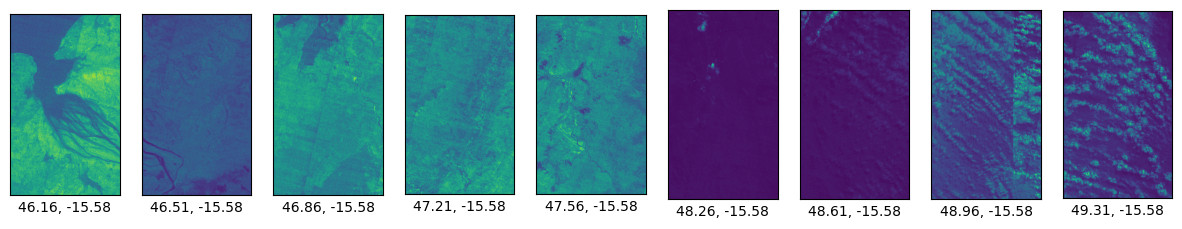

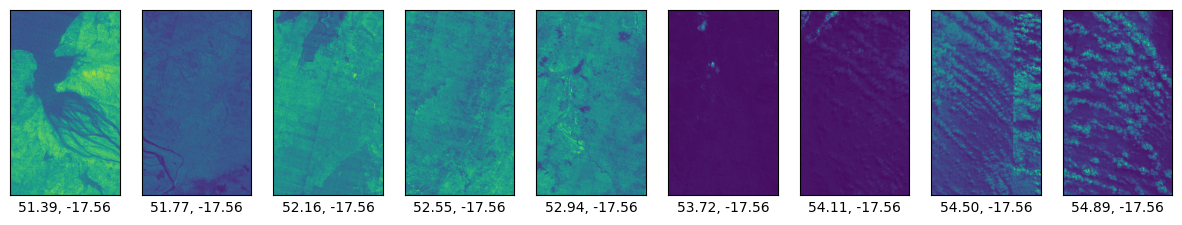

In [12]:
o_dir = '/home/ming/BP/sentinel/sentinel_downloaded/001'
p_dir = '/home/ming/BP/sentinel/sentinel_preprocessed/001/'
m_dir = '/home/ming/BP/sentinel/sentinel_preprocessed/001/EPSG3857'

# show 10 images from o_dir, and the corresponding images from p_dir
import os
from merge_sentinel import get_images_order_by_gps_location

#retrieve 10 tiff images from the dir order by creation time
o_imgs = get_images_order_by_gps_location(o_dir, num_images=30)
show_images(o_imgs[:9])


p_imgs = get_images_order_by_gps_location(m_dir, num_images=9)
show_images(p_imgs[:9])




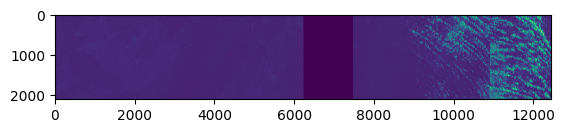

In [11]:

stitched = '/home/ming/BP/sentinel/sentinel_preprocessed/001/EPSG3857/stitched.tif'
show_img(stitched)


In [ ]:
o1 = '/home/ming/BP/sentinel/sentinel_preprocessed/001/2be6703e4380caaba3b764c18729e1cd.tiff'
p1 = '/home/ming/BP/sentinel/sentinel_preprocessed/001/EPSG3857/2be6703e4380caaba3b764c18729e1cd.tiff'

o2 = '/home/ming/BP/sentinel/sentinel_preprocessed/001/3a1f963e88f3f33fa382e8e2905ca1eb.tiff'
p2 = '/home/ming/BP/sentinel/sentinel_preprocessed/001/EPSG3857/3a1f963e88f3f33fa382e8e2905ca1eb.tiff'

# stitched = '/home/ming/BP/sentinel/sentinel_preprocessed/EPSG3857/stitched.tiff'
# show_13_bands(o1)
# show_original_and_projected(o1, p1, band = 10)
# show_original_and_projected(o2, p2, band = 10)

show_images([o1, p1])

RasterioIOError: /home/ming/BP/sentinel/sentinel_preprocessed/EPSG3857/stitched.tiff: No such file or directory